<a href="https://colab.research.google.com/github/VesalAhsani/Deep-learning-and-AI-with-PyTorch/blob/main/Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Linear Regression is a statistical method used for finding a linear relationship between a dependent variable (y) and one or more independent variables (x). The goal is to fit a line to the data points that minimizes the difference between the actual and predicted values of the dependent variable. This line can be used to make predictions about the dependent variable given new values of the independent variables.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20
X = np.random.random(N)*10 - 5
Y = 0.5*X - 1 + np.random.randn(N)

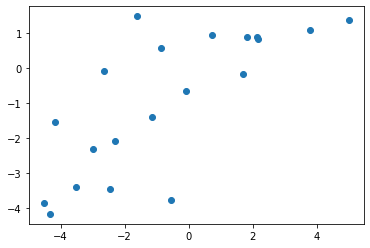

In [3]:
plt.scatter(X,Y);

In [4]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [5]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [6]:
type(inputs)

torch.Tensor

In [7]:
model = nn.Linear(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [8]:
n_epochs = 30
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f"Epoch: {it+1}/{n_epochs} loss: {loss.item()}")

Epoch: 1/30 loss: 1.961112380027771
Epoch: 2/30 loss: 1.8075147867202759
Epoch: 3/30 loss: 1.7391071319580078
Epoch: 4/30 loss: 1.7049528360366821
Epoch: 5/30 loss: 1.6860641241073608
Epoch: 6/30 loss: 1.6748030185699463
Epoch: 7/30 loss: 1.6677623987197876
Epoch: 8/30 loss: 1.6632388830184937
Epoch: 9/30 loss: 1.6602895259857178
Epoch: 10/30 loss: 1.6583516597747803
Epoch: 11/30 loss: 1.6570736169815063
Epoch: 12/30 loss: 1.6562286615371704
Epoch: 13/30 loss: 1.6556698083877563
Epoch: 14/30 loss: 1.6552995443344116
Epoch: 15/30 loss: 1.6550546884536743
Epoch: 16/30 loss: 1.6548923254013062
Epoch: 17/30 loss: 1.6547847986221313
Epoch: 18/30 loss: 1.6547133922576904
Epoch: 19/30 loss: 1.6546663045883179
Epoch: 20/30 loss: 1.6546351909637451
Epoch: 21/30 loss: 1.6546144485473633
Epoch: 22/30 loss: 1.654600739479065
Epoch: 23/30 loss: 1.6545915603637695
Epoch: 24/30 loss: 1.654585838317871
Epoch: 25/30 loss: 1.6545816659927368
Epoch: 26/30 loss: 1.6545789241790771
Epoch: 27/30 loss: 1.654

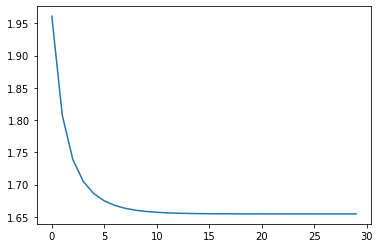

In [9]:
plt.plot(losses);

In [10]:
with torch.no_grad():
  predicted = model(inputs).numpy()

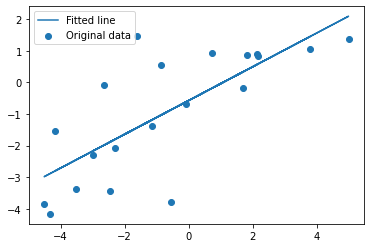

In [11]:
plt.scatter(X,Y, label = "Original data")
plt.plot(X, predicted, label="Fitted line")
plt.legend();

# Logistic Regression (Linear Classification)
Logistic Regression is a type of regression analysis used when the dependent variable is binary (0 or 1, true or false, yes or no) in nature. Logistic Regression models the relationship between the dependent variable and the independent variables using a logistic function, also known as the sigmoid function, to predict the probability of the dependent variable being 0 or 1. The output of a logistic regression model is transformed into a binary prediction using a threshold, typically 0.5.

In [12]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
data = load_breast_cancer()

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [17]:
N, D = X_train.shape

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [20]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [21]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  train_loss = criterion(outputs, y_train)

  train_loss.backward()
  optimizer.step()

  test_outputs = model(X_test)
  test_loss = criterion(test_outputs, y_test)

  train_losses[it] = train_loss.item()
  test_losses[it] = test_loss.item()

  if (it+1) % 50 == 0:
    print(f"Epochs: {it+1}/{n_epochs}, train_loss: {train_loss.item():.4f}, test_loss: {test_loss.item():.4f}")

Epochs: 50/1000, train_loss: 0.3911, test_loss: 0.4119
Epochs: 100/1000, train_loss: 0.2978, test_loss: 0.3267
Epochs: 150/1000, train_loss: 0.2434, test_loss: 0.2784
Epochs: 200/1000, train_loss: 0.2073, test_loss: 0.2473
Epochs: 250/1000, train_loss: 0.1817, test_loss: 0.2258
Epochs: 300/1000, train_loss: 0.1626, test_loss: 0.2102
Epochs: 350/1000, train_loss: 0.1479, test_loss: 0.1984
Epochs: 400/1000, train_loss: 0.1362, test_loss: 0.1893
Epochs: 450/1000, train_loss: 0.1267, test_loss: 0.1821
Epochs: 500/1000, train_loss: 0.1187, test_loss: 0.1762
Epochs: 550/1000, train_loss: 0.1121, test_loss: 0.1714
Epochs: 600/1000, train_loss: 0.1063, test_loss: 0.1673
Epochs: 650/1000, train_loss: 0.1014, test_loss: 0.1638
Epochs: 700/1000, train_loss: 0.0970, test_loss: 0.1609
Epochs: 750/1000, train_loss: 0.0932, test_loss: 0.1584
Epochs: 800/1000, train_loss: 0.0897, test_loss: 0.1562
Epochs: 850/1000, train_loss: 0.0867, test_loss: 0.1542
Epochs: 900/1000, train_loss: 0.0839, test_loss: 

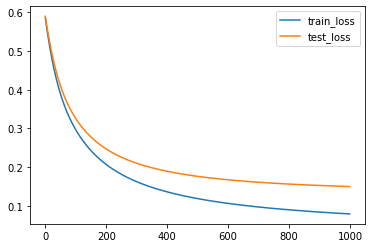

In [23]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend();

In [24]:
with torch.no_grad():
  predict_train = model(X_train)
  predict_train = np.round(predict_train.numpy())
  acc_train = np.mean(predict_train == y_train.numpy())

  predict_test = model(X_test)
  predict_test = np.round(predict_test.numpy())
  acc_test = np.mean(predict_test == y_test.numpy())

  print(f"train_accuracy: {acc_train:.4f}, test_accuracy: {acc_test:.4f}")

train_accuracy: 0.9846, test_accuracy: 0.9649


In [25]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4507, -0.2897, -0.2298, -0.3273, -0.1650, -0.3254, -0.4942, -0.2928,
                       -0.2691,  0.6269, -0.2186,  0.2198, -0.3360, -0.3862, -0.2968,  0.0557,
                        0.1739, -0.1291,  0.1873,  0.4579, -0.4054, -0.6077, -0.4219, -0.5675,
                       -0.2920, -0.1620, -0.3410, -0.5161, -0.4801, -0.2359]])),
             ('0.bias', tensor([0.4218]))])

In [26]:
torch.save(model.state_dict(), "model-1.pt")

In [27]:
!ls

model-1.pt  sample_data


In [28]:
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load("model-1.pt"))

<All keys matched successfully>

In [29]:
with torch.no_grad():
  predict_train = model2(X_train)
  predict_train = np.round(predict_train.numpy())
  acc_train = np.mean(predict_train == y_train.numpy())

  predict_test = model2(X_test)
  predict_test = np.round(predict_test.numpy())
  acc_test = np.mean(predict_test == y_test.numpy())

  print(f"train_accuracy: {acc_train:.4f}, test_accuracy: {acc_test:.4f}")

train_accuracy: 0.9846, test_accuracy: 0.9649


In [30]:
from google.colab import files
files.download("model-1.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Logistic Regression (Linear Classification with Logits)

Everything is same as the previous model except 2 parts:
1. Model (remove `nn.Sigmoid()`)
2. Criterion (use `BCEwithLogitsLoss()` instead of `BCELoss()`)
3. Prediction (use > 0 instead of rounding)

Logistic Regression with Logits refers to the use of the logit function, which is the inverse of the logistic (sigmoid) function, as the output of a logistic regression model instead of the predicted probability. The logit function provides a more direct and interpretable representation of the relationship between the dependent variable and the independent variables, which can be useful in certain situations. The output of a logistic regression with logits is transformed into a binary prediction using a threshold, typically 0.5, in the same manner as a traditional logistic regression model.

In [31]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
data = load_breast_cancer()

In [34]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [36]:
N, D = X_train.shape

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [39]:
model = nn.Linear(D,1) # This changed

In [40]:
criterion = nn.BCEWithLogitsLoss() # This changed
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [41]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  train_loss = criterion(outputs, y_train)

  train_loss.backward()
  optimizer.step()

  test_outputs = model(X_test)
  test_loss = criterion(test_outputs, y_test)

  train_losses[it] = train_loss.item()
  test_losses[it] = test_loss.item()

  if (it+1) % 50 == 0:
    print(f"Epochs: {it+1}/{n_epochs}, train_loss: {train_loss.item():.4f}, test_loss: {test_loss.item():.4f}")

Epochs: 50/1000, train_loss: 0.4800, test_loss: 0.4572
Epochs: 100/1000, train_loss: 0.3497, test_loss: 0.3322
Epochs: 150/1000, train_loss: 0.2794, test_loss: 0.2665
Epochs: 200/1000, train_loss: 0.2355, test_loss: 0.2265
Epochs: 250/1000, train_loss: 0.2054, test_loss: 0.1998
Epochs: 300/1000, train_loss: 0.1835, test_loss: 0.1807
Epochs: 350/1000, train_loss: 0.1668, test_loss: 0.1666
Epochs: 400/1000, train_loss: 0.1537, test_loss: 0.1557
Epochs: 450/1000, train_loss: 0.1430, test_loss: 0.1471
Epochs: 500/1000, train_loss: 0.1342, test_loss: 0.1401
Epochs: 550/1000, train_loss: 0.1268, test_loss: 0.1344
Epochs: 600/1000, train_loss: 0.1205, test_loss: 0.1297
Epochs: 650/1000, train_loss: 0.1149, test_loss: 0.1257
Epochs: 700/1000, train_loss: 0.1101, test_loss: 0.1223
Epochs: 750/1000, train_loss: 0.1058, test_loss: 0.1193
Epochs: 800/1000, train_loss: 0.1019, test_loss: 0.1168
Epochs: 850/1000, train_loss: 0.0985, test_loss: 0.1147
Epochs: 900/1000, train_loss: 0.0954, test_loss: 

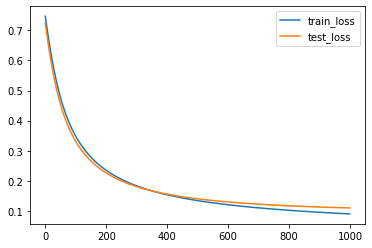

In [42]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend();

In [43]:
with torch.no_grad():
  predict_train = model(X_train)
  predict_train = predict_train.numpy() > 0  # This changed
  acc_train = np.mean(predict_train == y_train.numpy())

  predict_test = model(X_test)
  predict_test = predict_test.numpy() > 0 # This changed
  acc_test = np.mean(predict_test == y_test.numpy())

  print(f"train_accuracy: {acc_train:.4f}, test_accuracy: {acc_test:.4f}")

train_accuracy: 0.9868, test_accuracy: 0.9737
